In [1]:
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import eli5.sklearn
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

%matplotlib inline

/home/luskoecute/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


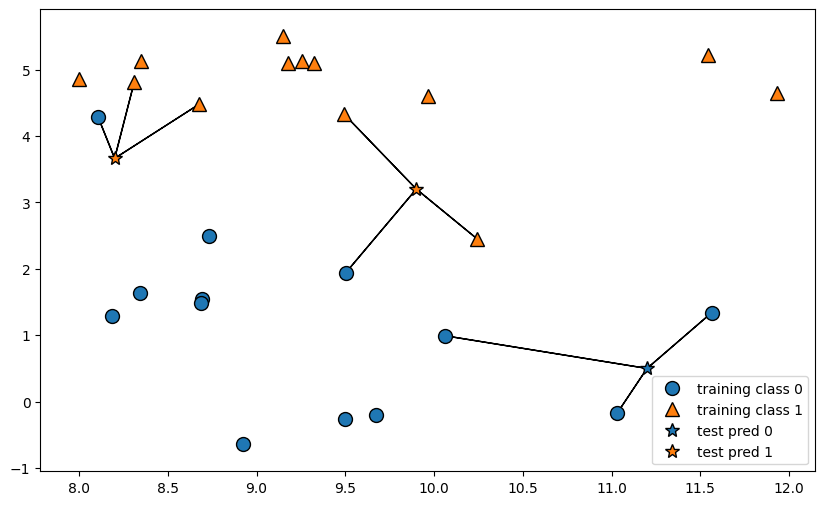

In [2]:
plt.figure(figsize=(10, 6))
mglearn.plot_knn_classification.plot_knn_classification(n_neighbors=3)

In [3]:
# k и регуляризация
# Параметърът k се явява форма на регуляризация. Колкото по-висок е, толкова "по-прост" ще бъде модела (ще открие по-проста зависимост между данните).

In [4]:
def plot_knn_parameter():
    X, y = mglearn.datasets.make_forge()

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    for n_neighbors, ax in zip([1, 3, 9], axes):
        clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
        mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
        mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
        ax.set_title("{} neighbour(s)".format(n_neighbors))

/home/luskoecute/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


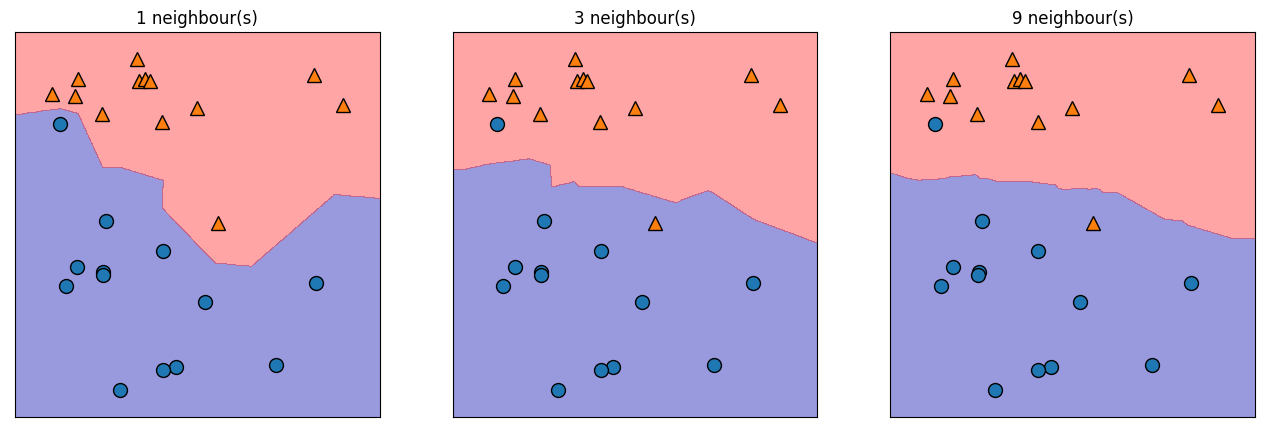

In [6]:
plot_knn_parameter()